# Importing Dependencies

In [48]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Data Collection & Processing
Load movie data

In [51]:
# Replace 'input_file_path' with the path to your input file
input_file_path = "movies.dat"

# Replace 'output_file_path' with the desired path for the output .csv file
output_file_path = "output_file.csv"

# Read the .dat file into a DataFrame using a specific encoding
df_movie = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

# Write the DataFrame to a .csv file
df_movie.to_csv(output_file_path, index=False)
df_movie.head(20)

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [52]:
df_movie.columns =['MovieIDs','MovieName','Genre']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
df_movie.shape

(3883, 3)

In [54]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieIDs   3883 non-null   int64 
 1   MovieName  3883 non-null   object
 2   Genre      3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


# Handling the Missing values

In [55]:
df_movie.isnull().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

Load the rating data

In [59]:
# Replace 'input_file_path' with the path to your input file
input_file_path = "ratings.dat"

# Replace 'output_file_path' with the desired path for the output .csv file
output_file_path = "output_file.csv"

# Read the .dat file into a DataFrame using a specific encoding
df_rating = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

# Write the DataFrame to a .csv file
df_rating.to_csv(output_file_path, index=False)
df_rating.head(20)

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [60]:
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [61]:
df_rating.shape

(1000209, 4)

In [62]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Ratings    1000209 non-null  int64
 3   TimeStamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 38.2 MB


In [63]:
df_rating.isnull().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

Load User data

In [64]:
# Replace 'input_file_path' with the path to your input file
input_file_path = "users.dat"

# Replace 'output_file_path' with the desired path for the output .csv file
output_file_path = "output_file.csv"

# Read the .dat file into a DataFrame using a specific encoding
df_user = pd.read_csv(input_file_path, encoding='latin1',sep = '::', engine='python',header=None)

# Write the DataFrame to a .csv file
df_user.to_csv(output_file_path, index=False)
df_user.head(20)

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [65]:
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [66]:
df_user.shape

(6040, 5)

In [67]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 283.1+ KB


Handling the Missing values

In [68]:
df_user.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

# Combine the all dataset

In [69]:
# merge all 3 data set 
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,1.0,Toy Story (1995),Animation|Children's|Comedy,1,1193,5,978300760,1.0,F,1.0,10.0,48067
1,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
3,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
4,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455


# Data Analysis

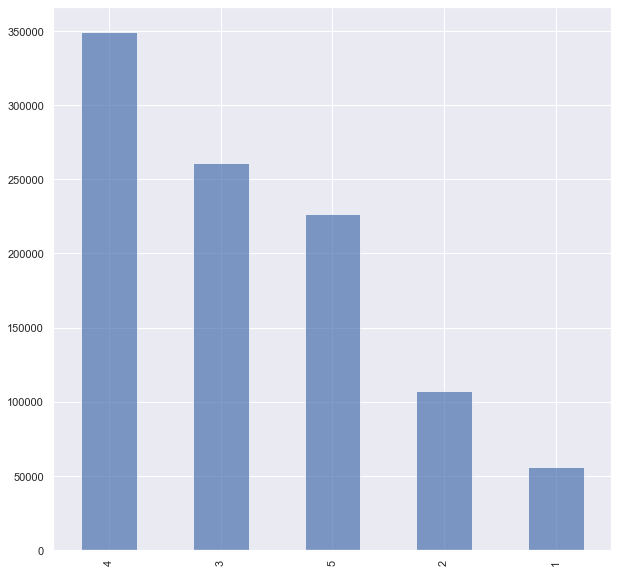

In [70]:
#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

Text(0.5, 0, 'Age')

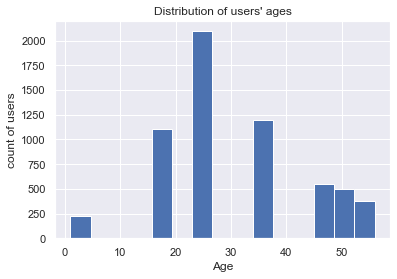

In [71]:
df.Age.plot.hist(bins=15)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [72]:
movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                      1
Only You (1994)                             1
Open Season (1996)                          1
Open Your Eyes (Abre los ojos) (1997)       1
Operation Condor (Feiying gaiwak) (1990)    1
                                           ..
Toy Story (1995)                            1
Toy Story 2 (1999)                          1
Toys (1992)                                 1
Total Recall (1990)                         1
Trading Places (1983)                       1
Length: 1000, dtype: int64


# Perform LogisticRegression on first 700 extracted records

In [73]:
first_700 = df[500:]
first_700.dropna(inplace=True)

<ipython-input-73-fea96ab47787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_700.dropna(inplace=True)


In [74]:
#Use the following features:movie id,age,occupation
features = first_700[['MovieID','Age','Occupation']].values

In [75]:
#Use rating as label
labels = first_700[['Ratings']].values

In [76]:
# Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Text(0.5, 0, 'Ratings')

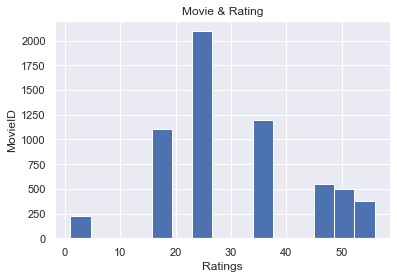

In [77]:
#Create a histogram for movie
df.Age.plot.hist(bins=15)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

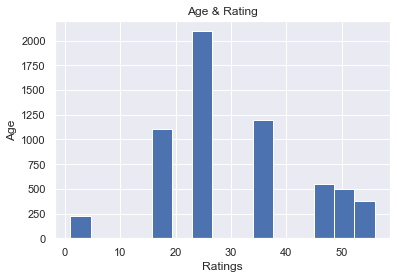

In [78]:
#Create a histogram for age
df.Age.plot.hist(bins=15)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

In [79]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
log = round(logreg.score(train, train_labels) * 100, 2)
log

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


34.11